# NAIVE BAYES

In [1]:
import pandas as pd

## I. Chuẩn bị dữ liệu

In [2]:
df = pd.read_csv('../Dataset/archive/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
X = df.drop(['Attrition', 'EmployeeNumber'], axis=1)
y = df['Attrition']

In [5]:
print(f'Số bản ghi dữ liệu: {len(X)}')
print(f'Số cột dữ liệu (tập X): {len(X.columns)}')

Số bản ghi dữ liệu: 1470
Số cột dữ liệu (tập X): 33


In [6]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,Male,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,3,Male,...,3,80,1,17,3,3,5,2,0,3
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,4,Male,...,1,80,1,9,5,3,7,7,1,7
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2,Male,...,2,80,1,6,0,3,6,2,0,3
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,1,4,Male,...,4,80,0,17,3,2,9,6,0,8


In [7]:
y

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

## II. One Hot Encoding và Label Encoding

In [8]:
X_origin = X.copy()
y_origin = y.copy()

In [9]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# define model encoding
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
label_encoder = LabelEncoder()

In [10]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Giả sử X_origin là DataFrame ban đầu
encode_cols = [
    'BusinessTravel', 'Department', 'Education', 'EducationField',
    'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
    'JobRole', 'JobSatisfaction', 'MaritalStatus', 'Over18', 'OverTime',
    'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
    'WorkLifeBalance'
]
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# fit chuyển đổi luôn
X_encoded_array = one_hot_encoder.fit_transform(X_origin[encode_cols])

# Lấy tên cột mới sau khi mã hóa
encoded_columns = one_hot_encoder.get_feature_names_out(encode_cols)

# Tạo DataFrame từ mảng mã hóa
X_encoded_df = pd.DataFrame(X_encoded_array, columns=encoded_columns, index=X_origin.index)

# Gộp với phần dữ liệu còn lại
X_encode = pd.concat([X_origin.drop(columns=encode_cols), X_encoded_df], axis=1)

In [11]:
X_encode

,Age,DailyRate,DistanceFromHome,EmployeeCount,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,41,1102,1,1,94,5993,19479,8,11,80,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,49,279,8,1,61,5130,24907,1,23,80,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,37,1373,2,1,92,2090,2396,6,15,80,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,33,1392,3,1,56,2909,23159,1,11,80,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,27,591,2,1,40,3468,16632,9,12,80,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,1,41,2571,12290,4,17,80,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,39,613,6,1,42,9991,21457,4,15,80,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,27,155,4,1,87,6142,5174,1,20,80,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,49,1023,2,1,63,5390,13243,2,14,80,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [12]:
y_encode = label_encoder.fit_transform(y_origin)

In [13]:
y_encode

array([1, 0, 1, ..., 0, 0, 0], shape=(1470,))

## III. Tự định nghĩa Class, Function

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

class My_GaussianNB:
    def __init__(self):
        self.classes = None
        self.mean = {}
        self.var = {}
        self.priors = {}

    def fit(self, X, y):
        self.classes = np.unique(y)
        n_samples = X.shape[0]

        for c in self.classes:
            X_c = X[y == c]
            self.priors[c] = len(X_c) / n_samples
            self.mean[c] = np.mean(X_c, axis=0)
            self.var[c] = np.var(X_c, axis=0) + 1e-9

    def _gaussian_pdf(self, x, mean, var):
        return np.exp(-((x - mean) ** 2) / (2 * var)) / np.sqrt(2 * np.pi * var)

    def predict_log_proba(self, X):
        n_samples = X.shape[0]
        n_classes = len(self.classes)
        log_probs = np.zeros((n_samples, n_classes))

        for idx, c in enumerate(self.classes):
            log_prior = np.log(self.priors[c])
            pdf = self._gaussian_pdf(X, self.mean[c], self.var[c])
            log_likelihood = np.sum(np.log(pdf + 1e-9), axis=1)
            log_probs[:, idx] = log_prior + log_likelihood

        return log_probs

    def predict(self, X):
        log_probs = self.predict_log_proba(X)
        return self.classes[np.argmax(log_probs, axis=1)]

class My_BernoulliNB:
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        self.classes = None
        self.feature_prob = {}  # P(feature=1|class)
        self.priors = {}
    
    def fit(self, X, y):
        self.classes = np.unique(y)
        n_samples = X.shape[0]
        n_features = X.shape[1]
        
        for c in self.classes:
            X_c = X[y == c]
            n_c = len(X_c)
            
            # Prior probability P(class)
            self.priors[c] = n_c / n_samples
            
            # Feature probability P(feature=1|class) với Laplace smoothing
            # Smoothing: (count + alpha) / (total + 2*alpha)
            # 2*alpha vì Bernoulli có 2 giá trị (0 và 1)
            feature_count = np.sum(X_c, axis=0)
            self.feature_prob[c] = (feature_count + self.alpha) / (n_c + 2 * self.alpha)
        
        return self
    
    def predict_log_proba(self, X):
        n_samples = X.shape[0]
        n_classes = len(self.classes)
        log_probs = np.zeros((n_samples, n_classes))
        
        for idx, c in enumerate(self.classes):
            log_prior = np.log(self.priors[c])
            
            # Log likelihood cho Bernoulli:
            # log P(X|c) = Σ[x_i * log(p_i) + (1-x_i) * log(1-p_i)]
            p = self.feature_prob[c]
            log_p = np.log(p)
            log_1_p = np.log(1 - p)
            
            # Vectorized calculation
            log_likelihood = X @ log_p + (1 - X) @ log_1_p
            log_probs[:, idx] = log_prior + log_likelihood
        
        return log_probs
    
    def predict(self, X):
        log_probs = self.predict_log_proba(X)
        return self.classes[np.argmax(log_probs, axis=1)]


## IV. Xây dựng mô hình

### 1. Thực hiện với dữ liệu gốc

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def fit_and_evaluate_hybrid(gnb, bnb, 
                           X_train, y_train, 
                           X_test, y_test, 
                           description="Hybrid Gaussian–Bernoulli"):
    print("="*60)
    print(f"ĐANG HUẤN LUYỆN: {description}")


    try:
        # Copy tránh làm thay đổi data gốc
        X_train = X_train.copy()
        X_test  = X_test.copy()

        continuous_data = [
        'Age', 'DailyRate', 'DistanceFromHome', 'EmployeeCount',
        'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'PercentSalaryHike', 'StandardHours', 'TotalWorkingYears',
        'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
        'YearsSinceLastPromotion', 'YearsWithCurrManager'
        ]

        # scaler = StandardScaler()
        X_train_num = X_train[continuous_data].to_numpy()
        # X_train_num = scaler.fit_transform(X_train_num)
        X_train_cat = X_train.drop(continuous_data, axis=1).to_numpy()

        X_test_num = X_test[continuous_data].to_numpy()
        # X_test_num = scaler.transform(X_test_num)
        X_test_cat = X_test.drop(continuous_data, axis=1).to_numpy()



        # 1. Fit mô hình
        gnb.fit(X_train_num, y_train)
        bnb.fit(X_train_cat, y_train)

        # 2. Predict log xác suất của từng model
        log_proba_gnb = gnb.predict_log_proba(X_test_num)
        log_proba_bnb = bnb.predict_log_proba(X_test_cat)

        # 3. Cộng log xác suất (hybrid)
        combined_log = log_proba_gnb + log_proba_bnb

        # 4. Lấy class dự đoán
        y_pred = gnb.classes[np.argmax(combined_log, axis=1)]

        # 5. Đánh giá
        print(f"\n Accuracy: {accuracy_score(y_test, y_pred):.4f}")
        print("\n Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
        print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    except Exception as e:
        print(f"\n LỖI: {e}")

    print("="*60 + "\n")


In [16]:
from sklearn.model_selection import train_test_split

X_copy_encode = X_encode.copy()
y_copy_encode = y_encode.copy()

In [17]:
X_train_origin_t1, X_test_origin_t1, y_train_origin_t1, y_test_origin_t1 = train_test_split(
    X_encode, y_encode, test_size=0.2, random_state=42
)

X_train_origin_t2, X_test_origin_t2, y_train_origin_t2, y_test_origin_t2 = train_test_split(
    X_encode, y_encode, test_size=0.3, random_state=42
)

X_train_origin_t3, X_test_origin_t3, y_train_origin_t3, y_test_origin_t3 = train_test_split(
    X_encode, y_encode, test_size=0.4, random_state=42
)

#### 1.1. NAIVEBAYES (Numpy thuần)

In [18]:
my_gnb = My_GaussianNB()
my_bnb = My_BernoulliNB()

In [19]:
fit_and_evaluate_hybrid(my_gnb, my_bnb, 
                           X_train_origin_t1, y_train_origin_t1, 
                           X_test_origin_t1, y_test_origin_t1,
                           "Naive gnb+bnb (Numpy thuần) trên dữ liệu gốc chưa chuẩn hóa (train/test: 4/1)")

ĐANG HUẤN LUYỆN: Naive gnb+bnb (Numpy thuần) trên dữ liệu gốc chưa chuẩn hóa (train/test: 4/1)

 Accuracy: 0.8707

 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       255
           1       0.52      0.36      0.42        39

    accuracy                           0.87       294
   macro avg       0.71      0.65      0.68       294
weighted avg       0.85      0.87      0.86       294


 Confusion Matrix:
 [[242  13]
 [ 25  14]]



In [20]:
fit_and_evaluate_hybrid(my_gnb, my_bnb, 
                           X_train_origin_t2, y_train_origin_t2, 
                           X_test_origin_t2, y_test_origin_t2,
                           "Naive gnb+bnb (Numpy thuần) trên dữ liệu gốc chưa chuẩn hóa (train/test: 7/3)")

ĐANG HUẤN LUYỆN: Naive gnb+bnb (Numpy thuần) trên dữ liệu gốc chưa chuẩn hóa (train/test: 7/3)

 Accuracy: 0.8481

 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       380
           1       0.45      0.46      0.46        61

    accuracy                           0.85       441
   macro avg       0.68      0.68      0.68       441
weighted avg       0.85      0.85      0.85       441


 Confusion Matrix:
 [[346  34]
 [ 33  28]]



In [21]:
fit_and_evaluate_hybrid(my_gnb, my_bnb, 
                           X_train_origin_t3, y_train_origin_t3, 
                           X_test_origin_t3, y_test_origin_t3,
                           "Naive gnb+bnb (Numpy thuần) trên dữ liệu gốc chưa chuẩn hóa (train/test: 6/4)")

ĐANG HUẤN LUYỆN: Naive gnb+bnb (Numpy thuần) trên dữ liệu gốc chưa chuẩn hóa (train/test: 6/4)

 Accuracy: 0.8707

 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.93       507
           1       0.54      0.44      0.49        81

    accuracy                           0.87       588
   macro avg       0.73      0.69      0.71       588
weighted avg       0.86      0.87      0.87       588


 Confusion Matrix:
 [[476  31]
 [ 45  36]]



#### 1.2. NAIVEBAYES (Thư viện)

In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def fit_and_evaluate_hybrid_tv(gnb, bnb, 
                            X_train, y_train, 
                            X_test, y_test, 
                            description="Hybrid Gaussian–Bernoulli"):
    print("="*60)
    print(f" ĐANG HUẤN LUYỆN: {description}")

    try:

        # Copy tránh làm thay đổi data gốc
        X_train = X_train.copy()
        X_test  = X_test.copy()

        continuous_data = [
        'Age', 'DailyRate', 'DistanceFromHome', 'EmployeeCount',
        'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'PercentSalaryHike', 'StandardHours', 'TotalWorkingYears',
        'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
        'YearsSinceLastPromotion', 'YearsWithCurrManager'
        ]

        # scaler = StandardScaler()
        X_train_num = X_train[continuous_data]
        # X_train_num = scaler.fit_transform(X_train_num)
        X_train_cat = X_train.drop(continuous_data, axis=1)

        X_test_num = X_test[continuous_data]
        # X_test_num = scaler.transform(X_test_num)
        X_test_cat = X_test.drop(continuous_data, axis=1)

        # 2. Fit 2 model sklearn
        gnb.fit(X_train_num, y_train)
        bnb.fit(X_train_cat, y_train)

        # 3. Predict log xác suất
        log_gnb = gnb.predict_log_proba(X_test_num)
        log_bnb = bnb.predict_log_proba(X_test_cat)

        # 4. Cộng log xác suất (hybrid)
        combined_log = log_gnb + log_bnb

        # 5. Lấy class dự đoán
        y_pred = gnb.classes_[np.argmax(combined_log, axis=1)]

        # 6. Đánh giá
        print(f"\n Accuracy: {accuracy_score(y_test, y_pred):.4f}")
        print("\n Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
        print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    except Exception as e:
        print(f"\n LỖI: {e}")

    print("="*60 + "\n")


In [23]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

lib_gnb = GaussianNB()
lib_bnb = BernoulliNB()

In [24]:
fit_and_evaluate_hybrid_tv(lib_gnb, lib_bnb, 
                           X_train_origin_t1, y_train_origin_t1, 
                           X_test_origin_t1, y_test_origin_t1,
                           "Naive gnb+bnb (Thư viện) trên dữ liệu gốc chưa chuẩn hóa (train/test: 4/1)")

 ĐANG HUẤN LUYỆN: Naive gnb+bnb (Thư viện) trên dữ liệu gốc chưa chuẩn hóa (train/test: 4/1)

 Accuracy: 0.8707

 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       255
           1       0.52      0.36      0.42        39

    accuracy                           0.87       294
   macro avg       0.71      0.65      0.68       294
weighted avg       0.85      0.87      0.86       294


 Confusion Matrix:
 [[242  13]
 [ 25  14]]



In [25]:
fit_and_evaluate_hybrid_tv(lib_gnb, lib_bnb, 
                           X_train_origin_t2, y_train_origin_t2, 
                           X_test_origin_t2, y_test_origin_t2,
                           "Naive gnb+bnb (Thư viện) trên dữ liệu gốc chưa chuẩn hóa (train/test: 7/3)")

 ĐANG HUẤN LUYỆN: Naive gnb+bnb (Thư viện) trên dữ liệu gốc chưa chuẩn hóa (train/test: 7/3)

 Accuracy: 0.8481

 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       380
           1       0.45      0.46      0.46        61

    accuracy                           0.85       441
   macro avg       0.68      0.68      0.68       441
weighted avg       0.85      0.85      0.85       441


 Confusion Matrix:
 [[346  34]
 [ 33  28]]



In [26]:
fit_and_evaluate_hybrid_tv(lib_gnb, lib_bnb, 
                           X_train_origin_t3, y_train_origin_t3, 
                           X_test_origin_t3, y_test_origin_t3,
                           "Naive gnb+bnb (Thư viện) trên dữ liệu gốc chưa chuẩn hóa (train/test: 6/4)")

 ĐANG HUẤN LUYỆN: Naive gnb+bnb (Thư viện) trên dữ liệu gốc chưa chuẩn hóa (train/test: 6/4)

 Accuracy: 0.8707

 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.93       507
           1       0.54      0.44      0.49        81

    accuracy                           0.87       588
   macro avg       0.73      0.69      0.71       588
weighted avg       0.86      0.87      0.87       588


 Confusion Matrix:
 [[476  31]
 [ 45  36]]



#### 1.3. Nhận xét

- Kết quả của mô hình NAIVEBAYES bằng Numpy và mô hình NAIVEBAYES của thư viện (Scikit-learn) là giống hệt nhau ở cả 3 tỷ lệ chia.

     - Split 4/1: Cả hai đều có Accuracy 0.8707, ma trận nhầm lẫn [[242  13], [25  14]].

     - Split 7/3: Cả hai đều có Accuracy 0.8481, ma trận nhầm lẫn [[346  34], [33  28]].

     - Split 6/4: Cả hai đều có Accuracy 0.8707, ma trận nhầm lẫn [[476  31], [45  36]].

- Cả 3 tỷ lệ chia (4/1, 7/3, 6/4) đều cho thấy mô hình đang có 1 vài vấn đề:

    - Chỉ số Accuracy (84-87%) rất cao nhưng với dữ liệu mất cân bằng, Accuracy không phải thước đo chính.

    - Lớp 0 (đa số) hoạt động rất ổn: precision 0.91, recall 0.91 - 0.95, F1 0.91 - 0.93, mô hình nhận diện lớp 0 đáng tin cậy.

    - Lớp 1 (thiểu số) còn hạn chế: precision 0.45 - 0.54, recall 0.36 - 0.46, F1 0.42 - 0.49 → mô hình bỏ sót nhiều mẫu lớp 1 và dễ nhầm lẫn khi dự đoán lớp này.

Đây không phải là hiện tượng overfit. Nguyên nhân chính khiến mô hình hoạt động chưa tốt nằm ở sự mất cân bằng nghiêm trọng trong dữ liệu, khi khoảng 84% mẫu thuộc lớp 0. Điều này khiến mô hình bị thiên lệch mạnh về lớp chiếm đa số. Với Naive Bayes, việc dự đoán dựa trên xác suất tiên nghiệm (prior probability) của từng lớp, nên khi lớp 1 có xác suất gốc nhỏ, mô hình khó học và nhận diện chính xác lớp này. Hệ quả là precision và recall của lớp 1 đều thấp, phản ánh việc mô hình chưa thể nhận dạng tốt các mẫu thuộc lớp thiểu số.

### 2. Thực hiện với dữ liệu đã giảm chiều

#### 2.1. Giảm chiều sử dụng PCA

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

def fit_and_evaluate_gnb(gnb,
                           X_train, y_train, 
                           X_test, y_test, 
                           reduce_name, 
                           description="Gaussian"):
    print("="*60)
    print(f"ĐANG HUẤN LUYỆN: {description}")

    try:
        # Copy tránh làm thay đổi data gốc
        X_train = X_train.copy()
        X_test  = X_test.copy()
        # Danh sách các cột liên tục
        continuous_data = [
        'Age', 'DailyRate', 'DistanceFromHome', 'EmployeeCount',
        'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'PercentSalaryHike', 'StandardHours', 'TotalWorkingYears',
        'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
        'YearsSinceLastPromotion', 'YearsWithCurrManager'
        ]

        # ---- CHUẨN HÓA ----
        scaler = StandardScaler()

        # Fit scaler trên train
        X_train[continuous_data] = scaler.fit_transform(X_train[continuous_data])
        # Transform test 
        X_test[continuous_data] = scaler.transform(X_test[continuous_data])

        if reduce_name == 'PCA':
            model_rd = PCA(n_components=6)
            X_train = model_rd.fit_transform(X_train)
            X_test = model_rd.transform(X_test)
        elif reduce_name == 'LDA':
            model_rd = LinearDiscriminantAnalysis(n_components=1)
            X_train = model_rd.fit_transform(X_train, y_train)
            X_test = model_rd.transform(X_test)

        # from imblearn.over_sampling import SMOTE
        # smote = SMOTE(random_state=42)
        # X_train, y_train = smote.fit_resample(X_train, y_train)

        # nếu muốn cân bằng dữ liệu khi train thì bỏ comment dòng trên 

        # 1. Fit mô hình
        gnb.fit(X_train, y_train)

        # 2. Predict log xác suất 
        # log_proba_gnb = gnb.predict_log_proba(X_test)

        # 2. Lấy class dự đoán
        y_pred = gnb.predict(X_test)

        # 3. Đánh giá
        print(f"\n Accuracy: {accuracy_score(y_test, y_pred):.4f}")
        print("\n Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
        print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    except Exception as e:
        print(f"\n LỖI: {e}")

    print("="*60 + "\n")


In [28]:
# Lấy data
X_pca = X_encode.copy()
y_pca = y_encode.copy()

In [29]:
# Chia train/test
from sklearn.model_selection import train_test_split

X_train_t1_pca, X_test_t1_pca, y_train_t1_pca, y_test_t1_pca = train_test_split(X_pca, y_pca, test_size=0.2, random_state=42)
X_train_t2_pca, X_test_t2_pca, y_train_t2_pca, y_test_t2_pca = train_test_split(X_pca, y_pca, test_size=0.3, random_state=42)
X_train_t3_pca, X_test_t3_pca, y_train_t3_pca, y_test_t3_pca = train_test_split(X_pca, y_pca, test_size=0.4, random_state=42)

##### 2.1.1. NAIVEBAYES (Numpy thuần)

In [30]:
my_gnb = My_GaussianNB()

In [31]:
fit_and_evaluate_gnb(my_gnb,
                           X_train_t1_pca, y_train_t1_pca, 
                           X_test_t1_pca, y_test_t1_pca,
                           'PCA',
                           "Naive gnb (Numpy thuần) - PCA n=6 đã chuẩn hóa (train/test: 4/1)")

ĐANG HUẤN LUYỆN: Naive gnb (Numpy thuần) - PCA n=6 đã chuẩn hóa (train/test: 4/1)

 Accuracy: 0.8673

 Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294


 Confusion Matrix:
 [[255   0]
 [ 39   0]]



In [32]:
fit_and_evaluate_gnb(my_gnb,
                           X_train_t2_pca, y_train_t2_pca, 
                           X_test_t2_pca, y_test_t2_pca,
                           'PCA',
                           "Naive gnb (Numpy thuần) - PCA n=6 đã chuẩn hóa (train/test: 7/3)")

ĐANG HUẤN LUYỆN: Naive gnb (Numpy thuần) - PCA n=6 đã chuẩn hóa (train/test: 7/3)

 Accuracy: 0.8617

 Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.93       380
           1       0.00      0.00      0.00        61

    accuracy                           0.86       441
   macro avg       0.43      0.50      0.46       441
weighted avg       0.74      0.86      0.80       441


 Confusion Matrix:
 [[380   0]
 [ 61   0]]



In [33]:
fit_and_evaluate_gnb(my_gnb,
                           X_train_t3_pca, y_train_t3_pca, 
                           X_test_t3_pca, y_test_t3_pca,
                           'PCA',
                           "Naive gnb (Numpy thuần) - PCA n=6 đã chuẩn hóa (train/test: 6/4)")

ĐANG HUẤN LUYỆN: Naive gnb (Numpy thuần) - PCA n=6 đã chuẩn hóa (train/test: 6/4)

 Accuracy: 0.8639

 Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.93       507
           1       1.00      0.01      0.02        81

    accuracy                           0.86       588
   macro avg       0.93      0.51      0.48       588
weighted avg       0.88      0.86      0.80       588


 Confusion Matrix:
 [[507   0]
 [ 80   1]]



##### 2.1.2. NAIVEBAYES (Thư viện)

In [34]:
lib_gnb = GaussianNB()

In [35]:
fit_and_evaluate_gnb(lib_gnb,
                           X_train_t1_pca, y_train_t1_pca, 
                           X_test_t1_pca, y_test_t1_pca,
                           'PCA',
                           "Naive gnb (Thư viện) - PCA n=6 đã chuẩn hóa (train/test: 4/1)")

ĐANG HUẤN LUYỆN: Naive gnb (Thư viện) - PCA n=6 đã chuẩn hóa (train/test: 4/1)

 Accuracy: 0.8673

 Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294


 Confusion Matrix:
 [[255   0]
 [ 39   0]]



In [36]:
fit_and_evaluate_gnb(lib_gnb,
                           X_train_t2_pca, y_train_t2_pca, 
                           X_test_t2_pca, y_test_t2_pca,
                           'PCA',
                           "Naive gnb (Thư viện) - PCA n=6 đã chuẩn hóa (train/test: 7/3)")

ĐANG HUẤN LUYỆN: Naive gnb (Thư viện) - PCA n=6 đã chuẩn hóa (train/test: 7/3)

 Accuracy: 0.8617

 Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.93       380
           1       0.00      0.00      0.00        61

    accuracy                           0.86       441
   macro avg       0.43      0.50      0.46       441
weighted avg       0.74      0.86      0.80       441


 Confusion Matrix:
 [[380   0]
 [ 61   0]]



In [37]:
fit_and_evaluate_gnb(lib_gnb,
                           X_train_t3_pca, y_train_t3_pca, 
                           X_test_t3_pca, y_test_t3_pca,
                           'PCA',
                           "Naive gnb (Thư viện) - PCA n=6 đã chuẩn hóa (train/test: 6/4)")

ĐANG HUẤN LUYỆN: Naive gnb (Thư viện) - PCA n=6 đã chuẩn hóa (train/test: 6/4)

 Accuracy: 0.8639

 Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.93       507
           1       1.00      0.01      0.02        81

    accuracy                           0.86       588
   macro avg       0.93      0.51      0.48       588
weighted avg       0.88      0.86      0.80       588


 Confusion Matrix:
 [[507   0]
 [ 80   1]]



#### 2.2. Giảm chiều sử dụng LDA

In [38]:
# Lấy data
X_lda = X_encode.copy()
y_lda = y_encode.copy()

In [39]:
# Chia train/test
from sklearn.model_selection import train_test_split

X_train_t1_lda, X_test_t1_lda, y_train_t1_lda, y_test_t1_lda = train_test_split(X_lda, y_lda, test_size=0.2, random_state=42)
X_train_t2_lda, X_test_t2_lda, y_train_t2_lda, y_test_t2_lda = train_test_split(X_lda, y_lda, test_size=0.3, random_state=42)
X_train_t3_lda, X_test_t3_lda, y_train_t3_lda, y_test_t3_lda = train_test_split(X_lda, y_lda, test_size=0.4, random_state=42)

##### 2.2.1. NAIVEBAYES (Numpy thuần)

In [40]:
my_gnb = My_GaussianNB()

In [41]:
fit_and_evaluate_gnb(my_gnb,
                           X_train_t1_lda, y_train_t1_lda, 
                           X_test_t1_lda, y_test_t1_lda,
                           'LDA',
                           "Naive gnb (Numpy thuần) - LDA n=1 đã chuẩn hóa (train/test: 4/1)")

ĐANG HUẤN LUYỆN: Naive gnb (Numpy thuần) - LDA n=1 đã chuẩn hóa (train/test: 4/1)

 Accuracy: 0.8707

 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       255
           1       0.52      0.44      0.47        39

    accuracy                           0.87       294
   macro avg       0.72      0.69      0.70       294
weighted avg       0.86      0.87      0.87       294


 Confusion Matrix:
 [[239  16]
 [ 22  17]]



In [42]:
fit_and_evaluate_gnb(my_gnb,
                           X_train_t2_lda, y_train_t2_lda, 
                           X_test_t2_lda, y_test_t2_lda,
                           'LDA',
                           "Naive gnb (Numpy thuần) - LDA n=1 đã chuẩn hóa (train/test: 7/3)")

ĐANG HUẤN LUYỆN: Naive gnb (Numpy thuần) - LDA n=1 đã chuẩn hóa (train/test: 7/3)

 Accuracy: 0.8821

 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       380
           1       0.60      0.44      0.51        61

    accuracy                           0.88       441
   macro avg       0.76      0.70      0.72       441
weighted avg       0.87      0.88      0.87       441


 Confusion Matrix:
 [[362  18]
 [ 34  27]]



In [43]:
fit_and_evaluate_gnb(my_gnb,
                           X_train_t3_lda, y_train_t3_lda, 
                           X_test_t3_lda, y_test_t3_lda,
                           'LDA',
                           "Naive gnb (Numpy thuần) - LDA n=1 đã chuẩn hóa (train/test: 6/4)")

ĐANG HUẤN LUYỆN: Naive gnb (Numpy thuần) - LDA n=1 đã chuẩn hóa (train/test: 6/4)

 Accuracy: 0.8639

 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92       507
           1       0.51      0.41      0.45        81

    accuracy                           0.86       588
   macro avg       0.71      0.67      0.69       588
weighted avg       0.85      0.86      0.86       588


 Confusion Matrix:
 [[475  32]
 [ 48  33]]



##### 2.2.2. NAIVEBAYES (Thư viện)

In [44]:
lib_gnb = GaussianNB()

In [45]:
fit_and_evaluate_gnb(lib_gnb,
                           X_train_t1_lda, y_train_t1_lda, 
                           X_test_t1_lda, y_test_t1_lda,
                           'LDA',
                           "Naive gnb (Thư viện) - LDA n=1 đã chuẩn hóa (train/test: 4/1)")

ĐANG HUẤN LUYỆN: Naive gnb (Thư viện) - LDA n=1 đã chuẩn hóa (train/test: 4/1)

 Accuracy: 0.8707

 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       255
           1       0.52      0.44      0.47        39

    accuracy                           0.87       294
   macro avg       0.72      0.69      0.70       294
weighted avg       0.86      0.87      0.87       294


 Confusion Matrix:
 [[239  16]
 [ 22  17]]



In [46]:
fit_and_evaluate_gnb(lib_gnb,
                           X_train_t2_lda, y_train_t2_lda, 
                           X_test_t2_lda, y_test_t2_lda,
                           'LDA',
                           "Naive gnb (Thư viện) - LDA n=1 đã chuẩn hóa (train/test: 7/3)")

ĐANG HUẤN LUYỆN: Naive gnb (Thư viện) - LDA n=1 đã chuẩn hóa (train/test: 7/3)

 Accuracy: 0.8821

 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       380
           1       0.60      0.44      0.51        61

    accuracy                           0.88       441
   macro avg       0.76      0.70      0.72       441
weighted avg       0.87      0.88      0.87       441


 Confusion Matrix:
 [[362  18]
 [ 34  27]]



In [47]:
fit_and_evaluate_gnb(lib_gnb,
                           X_train_t3_lda, y_train_t3_lda, 
                           X_test_t3_lda, y_test_t3_lda,
                           'LDA',
                           "Naive gnb (Thư viện) - LDA n=1 đã chuẩn hóa (train/test: 6/4)")

ĐANG HUẤN LUYỆN: Naive gnb (Thư viện) - LDA n=1 đã chuẩn hóa (train/test: 6/4)

 Accuracy: 0.8639

 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92       507
           1       0.51      0.41      0.45        81

    accuracy                           0.86       588
   macro avg       0.71      0.67      0.69       588
weighted avg       0.85      0.86      0.86       588


 Confusion Matrix:
 [[475  32]
 [ 48  33]]



#### 2.3. Nhận xét

Cả 3 trường hợp đều sử dụng thuật toán Naive Bayes và đối mặt với vấn đề mất cân bằng dữ liệu (imbalanced data). Điều này dẫn đến một số đặc điểm chung:

- Accuracy : Độ chính xác (Accuracy) luôn cao (khoảng 0.84 - 0.88) do mô hình học cách dự đoán tốt lớp chiếm đa số (lớp 0). Chỉ số Accuracy không phản ánh đúng khả năng phân loại tổng thể, đặc biệt là với lớp thiểu số. Các chỉ số như Recall của class 1, F1-score class 1 sẽ là thước đo tốt hơn.

- Hiệu suất lớp 0 tốt: Các chỉ số Precision, Recall, F1-score của lớp 0 luôn rất cao (trên 0.90) và ổn định.

- Hiệu suất lớp 1 kém: Các chỉ số của lớp 1 (lớp thiểu số) luôn rất thấp, đặc biệt là Recall và F1-score, cho thấy mô hình gặp khó khăn trong việc xác định các mẫu thuộc lớp này.

So sánh kết quả 

| Phương pháp      | Nhận xét |
|------------------|----------|
| **Gốc (GNB + BNB)** | Khá ổn, nhưng recall class 1 thấp (~0.36–0.46) → mô hình bỏ sót nhiều mẫu 1 |
| **PCA + GNB**       | Rất tệ cho class 1 (recall ≈ 0, dự đoán class 1 gần như 0%) → mất thông tin phân biệt |
| **LDA + GNB**       | Tốt nhất: recall class 1 tăng lên 0.41–0.44 và precision ổn hơn, cân bằng 2 lớp tốt hơn |


Đánh giá
- PCA chỉ giữ thông tin phương sai, không quan tâm nhãn → recall class 1 rất tệ.
- LDA tối ưu để phân tách lớp, nên phù hợp với Naive Bayes và dữ liệu mất cân bằng → kết quả tốt hơn rõ rệt.

Kết luận về Overfit: Đây không phải là Overfitting.

Cả 3 phương pháp (Dữ liệu gốc, PCA, LDA) đều cho thấy cùng một vấn đề: là thiên vị (Bias) và Underfitting đối với lớp thiểu số (Lớp 1) do dữ liệu mất cân bằng.

Biện pháp Hiệu chỉnh Phù hợp

Áp dụng LDA:
- Chia X_train_full, X_test_full, y_train_full, y_test_full.
- fit LDA trên X_train_full, y_train_full.
- transform X_train_full, X_test_full để tạo ra X_train_lda, X_test_lda.

LDA + SMOTE (NB trên Dữ liệu Cân bằng):
- Áp dụng SMOTE chỉ trên tập huấn luyện LDA (X_train_lda) và nhãn gốc (y_train_full) => X_train_smote, y_train_smote.
- Kiểm tra: Xác minh rằng số lượng mẫu của Lớp 0 và Lớp 1 trong y_train_smote đã cân bằng.
- Huấn luyện NB (Không Trọng số): Huấn luyện mô hình Naive Bayes không sử dụng tham số trọng số lớp, với X_train_smote, y_train_smote.
- Đánh giá trên (X_test_lda, y_test_full).

## V. Trực quan

In [48]:
from matplotlib import pyplot as plt

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import time

def helper_and_plot(gnb,
                           X_train, y_train, 
                           X_test, y_test, 
                           reduce_name, 
                           description="Gaussian"):


    try:
        # Copy tránh làm thay đổi data gốc
        X_train = X_train.copy()
        X_test  = X_test.copy()
        # Danh sách các cột liên tục và phân loại
        continuous_data = [
        'Age', 'DailyRate', 'DistanceFromHome', 'EmployeeCount',
        'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'PercentSalaryHike', 'StandardHours', 'TotalWorkingYears',
        'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
        'YearsSinceLastPromotion', 'YearsWithCurrManager'
        ]

        # ---- CHUẨN HÓA ----
        scaler = StandardScaler()

        # Fit scaler trên train
        X_train[continuous_data] = scaler.fit_transform(X_train[continuous_data])

        # Transform test 
        X_test[continuous_data] = scaler.transform(X_test[continuous_data])

        if reduce_name == 'PCA':
            model_rd = PCA(n_components=6)
            X_train = model_rd.fit_transform(X_train)
            X_test = model_rd.transform(X_test)
        elif reduce_name == 'LDA':
            model_rd = LinearDiscriminantAnalysis(n_components=1)
            X_train = model_rd.fit_transform(X_train, y_train)
            X_test = model_rd.transform(X_test)

        # from imblearn.over_sampling import SMOTE
        # smote = SMOTE(random_state=42)
        # X_train, y_train = smote.fit_resample(X_train, y_train)

        # nếu muốn cân bằng dữ liệu khi train thì bỏ comment dòng trên 

        # 1. Fit mô hình
        gnb.fit(X_train, y_train)

        # 2. Predict log xác suất 
        # log_proba_gnb = gnb.predict_log_proba(X_test)

        # 2. Lấy class dự đoán
        y_pred = gnb.predict(X_test)


    except Exception as e:
        print(f"\n LỖI: {e}")




    def plot_prediction_vs_true(y_pred, y_test, title="So sánh Dự đoán và Thực tế"):
        y_pred = np.array(y_pred).flatten()
        y_test = np.array(y_test).flatten()

        plt.figure(figsize=(6, 4))
        x = np.arange(len(y_test))

        # Điểm đúng và sai
        correct = (y_pred == y_test)

        plt.scatter(x[correct], y_test[correct], color='green', label='Dự đoán đúng', marker='o')
        plt.scatter(x[~correct], y_test[~correct], color='red', label='Dự đoán sai', marker='x')

        plt.title(title, fontsize=14)
        plt.xlabel("Chỉ số mẫu (Index)")
        plt.ylabel("Nhãn (0/1)")
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()

    print()
    print('=' * 20, description, '=' * 20)
    print(f'X_train: {np.shape(X_train)}, X_test: {np.shape(X_test)}')
    print(f'Accuracy of model {gnb.__class__.__name__}: {accuracy_score(y_test, y_pred):.4f}')
    print(f'Precision: {precision_score(y_test, y_pred):.4f}')
    print(f'Recall: {recall_score(y_test, y_pred):.4f}')
    print(f'F1-score: {f1_score(y_test, y_pred):.4f}')
    print(f'Confusion matrix:\n{confusion_matrix(y_test, y_pred)}')
    print('=' * 20, description, '=' * 20)
    print()

    plot_prediction_vs_true(y_pred, y_test)

In [49]:
X_copy_encode = X_encode.copy()
y_copy_encode = y_encode.copy()

# --- TÁCH DỮ LIỆU ---
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X_copy_encode, y_copy_encode, test_size=0.3, random_state=42
)


==================== Naive gnb (Numpy thuần) - LDA n=1 đã chuẩn hóa (train/test: 7/3) ====================
X_train: (1029, 1), X_test: (441, 1)
Accuracy of model GaussianNB: 0.8821
Precision: 0.6000
Recall: 0.4426
F1-score: 0.5094
Confusion matrix:
[[362  18]
 [ 34  27]]
==================== Naive gnb (Numpy thuần) - LDA n=1 đã chuẩn hóa (train/test: 7/3) ====================



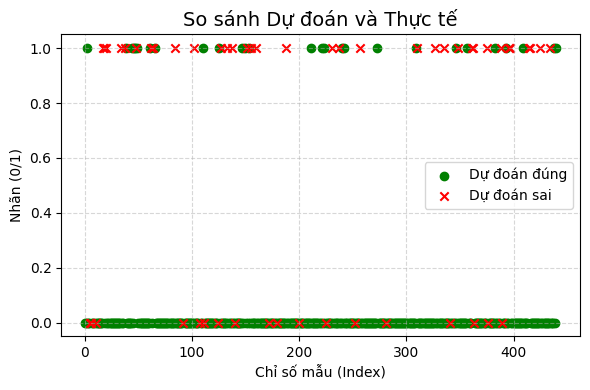

In [50]:
helper_and_plot(lib_gnb,
                           X_train_val, y_train_val, 
                           X_test, y_test,
                           'LDA',
                           "Naive gnb (Numpy thuần) - LDA n=1 đã chuẩn hóa (train/test: 7/3)")

Quan sát:
- Hầu hết mẫu class 0 được dự đoán đúng (green dot ở y=0 dày đặc).
- Mẫu class 1 (y=1) có nhiều dự đoán sai (red ×), nhưng vẫn có một số dự đoán đúng (green dot) → recall class 1 ~0.44, không quá cao nhưng đã phát hiện được lớp thiểu số.


Đánh giá mô hình có phù hợp không?
- Mức độ phù hợp:
    - Mô hình với dữ liệu gốc (GNB + BNB) và LDA + GNB tạm phù hợp với bài toán phân loại mất cân bằng, vì vẫn nhận diện được class 1.
    - Nếu dùng PCA, phần lớn class 1 sẽ không được nhận diện → không phù hợp.

- Điểm mạnh:
    - Nhận diện class 0 tốt → accuracy cao.
    - Có khả năng nhận diện class 1 → recall -> 0.4 → cân bằng hơn so với PCA

- Điểm hạn chế:
    - Một số mẫu class 1 vẫn bị bỏ sót → recall < 0.5
    - Có thể cải thiện bằng oversampling (SMOTE).

Mô hình chưa tốt:
- Mục tiêu của bài toán: Mục tiêu kinh doanh thực tế không phải là tìm ra người ở lại, mà là tìm ra người sắp nghỉ (Lớp 1) để có biện pháp can thiệp.
- Kết quả thực tế: Mô hình vẫn chưa tốt ở mục tiêu này.

Giải thích nhận định:
- GNB + BNB trên dữ liệu gốc và LDA + GNB:
    - Mô hình vẫn nhận diện được class 1 (mất cân bằng) nên tạm được coi là phù hợp.
    - Lý do: Class 1 xuất hiện, nên mô hình không chỉ dự đoán class 0 → tránh tình trạng “biased” hoàn toàn về lớp chiếm ưu thế.
- PCA:
    - Khi dùng PCA, phần lớn class 1 không được nhận diện.
    - Lý do: PCA là kỹ thuật giảm chiều dữ liệu dựa trên phương sai. Nếu class 1 ít mẫu và có đặc trưng biến thiên thấp, PCA có thể “loại bỏ” thông tin quan trọng của class 1 → dẫn đến mô hình không nhận diện được class này → không phù hợp.